# DATA CLEANING + EDA (Pandas)

Created By: Angelica Rojas

In [1]:
import pandas as pd
import re

## Upload Data

The data for this notebook could be found at this link: https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Calls-for-Service/k2nh-s5h5 . 

For the purpose of this lesson we will use the CSV file of the data.

In [2]:
df = pd.read_csv("BerkeleyPD_Calls_for_Service.csv")

#what does this do?
df.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,17034187,BURGLARY AUTO,06/14/2017 12:00:00 AM,15:15,BURGLARY - VEHICLE,3,09/25/2017 03:30:15 AM,"ALLSTON WAY &amp; SHATTUCK AVE\nBerkeley, CA\n...",ALLSTON WAY & SHATTUCK AVE,Berkeley,CA
1,17052235,GUN/WEAPON,09/01/2017 12:00:00 AM,22:56,WEAPONS OFFENSE,5,09/25/2017 03:30:18 AM,"UNIVERSITY AVENUE &amp; MILVIA ST\nBerkeley, C...",UNIVERSITY AVENUE & MILVIA ST,Berkeley,CA
2,17091126,THEFT MISD. (UNDER $950),06/10/2017 12:00:00 AM,10:45,LARCENY,6,09/25/2017 03:30:15 AM,"2500 SHATTUCK AVE\nBerkeley, CA\n(37.863811, -...",2500 SHATTUCK AVE,Berkeley,CA
3,17018444,BURGLARY AUTO,04/02/2017 12:00:00 AM,19:30,BURGLARY - VEHICLE,0,09/25/2017 03:30:11 AM,"DURANT AVENUE &amp; ELLSWORTH ST\nBerkeley, CA...",DURANT AVENUE & ELLSWORTH ST,Berkeley,CA
4,17033328,NARCOTICS,06/10/2017 12:00:00 AM,14:30,DRUG VIOLATION,6,09/25/2017 03:30:14 AM,"MILVIA STREET &amp; UNIVERSITY AVE\nBerkeley, ...",MILVIA STREET & UNIVERSITY AVE,Berkeley,CA


Why did we only want to display the first 5 rows of the dataframe?

What if we wanted to see the size of this dataframe?

In [3]:
# number of rows
len(df)

5617

In [4]:
# shape of df (rows, columns)
df.shape

(5617, 11)

# Part 1: DATA CLEANING

## Column Names

What do all these column names even mean? 

On that same website, BPD offers a narrative pdf file that describes the data they provided. https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Calls-for-Service/k2nh-s5h5


<img src = "DF_col_desc.png">

## Change Column Name(s)

Why would we want to change the column names?

In [5]:
df = df.rename(columns={'CVLEGEND': 'EVENTDESC'})
df.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,EVENTDESC,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,17034187,BURGLARY AUTO,06/14/2017 12:00:00 AM,15:15,BURGLARY - VEHICLE,3,09/25/2017 03:30:15 AM,"ALLSTON WAY &amp; SHATTUCK AVE\nBerkeley, CA\n...",ALLSTON WAY & SHATTUCK AVE,Berkeley,CA
1,17052235,GUN/WEAPON,09/01/2017 12:00:00 AM,22:56,WEAPONS OFFENSE,5,09/25/2017 03:30:18 AM,"UNIVERSITY AVENUE &amp; MILVIA ST\nBerkeley, C...",UNIVERSITY AVENUE & MILVIA ST,Berkeley,CA
2,17091126,THEFT MISD. (UNDER $950),06/10/2017 12:00:00 AM,10:45,LARCENY,6,09/25/2017 03:30:15 AM,"2500 SHATTUCK AVE\nBerkeley, CA\n(37.863811, -...",2500 SHATTUCK AVE,Berkeley,CA
3,17018444,BURGLARY AUTO,04/02/2017 12:00:00 AM,19:30,BURGLARY - VEHICLE,0,09/25/2017 03:30:11 AM,"DURANT AVENUE &amp; ELLSWORTH ST\nBerkeley, CA...",DURANT AVENUE & ELLSWORTH ST,Berkeley,CA
4,17033328,NARCOTICS,06/10/2017 12:00:00 AM,14:30,DRUG VIOLATION,6,09/25/2017 03:30:14 AM,"MILVIA STREET &amp; UNIVERSITY AVE\nBerkeley, ...",MILVIA STREET & UNIVERSITY AVE,Berkeley,CA


## Investigating Columns

What is the difference between "Block_Location" and "BLKADDR" columns in the dataframe? From the look of the DF that is displayed it looks as though they are almost the same.

In [6]:
#Let's look at the first value in "Block_Location"
df["Block_Location"][0]

'ALLSTON WAY &amp; SHATTUCK AVE\nBerkeley, CA\n(37.869363, -122.268028)'

In [7]:
#Let's look at the first value in "BLKADDR"
df["BLKADDR"][0]

'ALLSTON WAY & SHATTUCK AVE'

## Create New Columns

What is new information about "Block_Location" that we can actually use and save?

Let's create new columns for the information we extracted from those values.

In [8]:
coordinates = [["".join(x.split()) for x in re.split(r'[()]',i) if x.strip()][-1] for i in df["Block_Location"]]

#new values
longitude =[["".join(x.split()) for x in re.split(r'[,]',i) if x.strip()][-1] for i in coordinates]
latitude = [["".join(x.split()) for x in re.split(r'[,]',i) if x.strip()][0] for i in coordinates]

#create new columns for latitude and longitude
df["LATITUDE"] = latitude
df["LONGITUDE"] = longitude

#Check if it worked
df.head()



,CASENO,OFFENSE,EVENTDT,EVENTTM,EVENTDESC,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,LATITUDE,LONGITUDE
0,17034187,BURGLARY AUTO,06/14/2017 12:00:00 AM,15:15,BURGLARY - VEHICLE,3,09/25/2017 03:30:15 AM,"ALLSTON WAY &amp; SHATTUCK AVE\nBerkeley, CA\n...",ALLSTON WAY & SHATTUCK AVE,Berkeley,CA,37.869363,-122.268028
1,17052235,GUN/WEAPON,09/01/2017 12:00:00 AM,22:56,WEAPONS OFFENSE,5,09/25/2017 03:30:18 AM,"UNIVERSITY AVENUE &amp; MILVIA ST\nBerkeley, C...",UNIVERSITY AVENUE & MILVIA ST,Berkeley,CA,37.871884,-122.270752
2,17091126,THEFT MISD. (UNDER $950),06/10/2017 12:00:00 AM,10:45,LARCENY,6,09/25/2017 03:30:15 AM,"2500 SHATTUCK AVE\nBerkeley, CA\n(37.863811, -...",2500 SHATTUCK AVE,Berkeley,CA,37.863811,-122.267412
3,17018444,BURGLARY AUTO,04/02/2017 12:00:00 AM,19:30,BURGLARY - VEHICLE,0,09/25/2017 03:30:11 AM,"DURANT AVENUE &amp; ELLSWORTH ST\nBerkeley, CA...",DURANT AVENUE & ELLSWORTH ST,Berkeley,CA,37.867221,-122.263531
4,17033328,NARCOTICS,06/10/2017 12:00:00 AM,14:30,DRUG VIOLATION,6,09/25/2017 03:30:14 AM,"MILVIA STREET &amp; UNIVERSITY AVE\nBerkeley, ...",MILVIA STREET & UNIVERSITY AVE,Berkeley,CA,37.871884,-122.270752


## Drop Columns

We got all the information we needed from "Block_Location" keeping it would be taking up extra room in our dataframe. 

Let's drop the "Block_Location" from the dataframe.

In [9]:
df = df.drop("Block_Location", axis = 1)

#Check if it dropped
df.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,EVENTDESC,CVDOW,InDbDate,BLKADDR,City,State,LATITUDE,LONGITUDE
0,17034187,BURGLARY AUTO,06/14/2017 12:00:00 AM,15:15,BURGLARY - VEHICLE,3,09/25/2017 03:30:15 AM,ALLSTON WAY & SHATTUCK AVE,Berkeley,CA,37.869363,-122.268028
1,17052235,GUN/WEAPON,09/01/2017 12:00:00 AM,22:56,WEAPONS OFFENSE,5,09/25/2017 03:30:18 AM,UNIVERSITY AVENUE & MILVIA ST,Berkeley,CA,37.871884,-122.270752
2,17091126,THEFT MISD. (UNDER $950),06/10/2017 12:00:00 AM,10:45,LARCENY,6,09/25/2017 03:30:15 AM,2500 SHATTUCK AVE,Berkeley,CA,37.863811,-122.267412
3,17018444,BURGLARY AUTO,04/02/2017 12:00:00 AM,19:30,BURGLARY - VEHICLE,0,09/25/2017 03:30:11 AM,DURANT AVENUE & ELLSWORTH ST,Berkeley,CA,37.867221,-122.263531
4,17033328,NARCOTICS,06/10/2017 12:00:00 AM,14:30,DRUG VIOLATION,6,09/25/2017 03:30:14 AM,MILVIA STREET & UNIVERSITY AVE,Berkeley,CA,37.871884,-122.270752


We can drop other columns that we do not think would add useful information to our analysis. 

Although we did get this data from the Berkeley PD, let's make sure all values in "City" are "Berkeley". Also, Let's make sure the "State" is "CA" for all values.

In [10]:
df.City.unique()

array(['Berkeley'], dtype=object)

In [11]:
df["State"].unique()

array(['CA'], dtype=object)

We checked all the unique values for columns "State" and "City" and they are the results we wanted, therefore, we do not need those columns anymore. 

Drop the columns listed above.

In [12]:
#drop City and State columns
df = df.drop(["City","State"], axis = 1)

#Check if they dropped
df.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,EVENTDESC,CVDOW,InDbDate,BLKADDR,LATITUDE,LONGITUDE
0,17034187,BURGLARY AUTO,06/14/2017 12:00:00 AM,15:15,BURGLARY - VEHICLE,3,09/25/2017 03:30:15 AM,ALLSTON WAY & SHATTUCK AVE,37.869363,-122.268028
1,17052235,GUN/WEAPON,09/01/2017 12:00:00 AM,22:56,WEAPONS OFFENSE,5,09/25/2017 03:30:18 AM,UNIVERSITY AVENUE & MILVIA ST,37.871884,-122.270752
2,17091126,THEFT MISD. (UNDER $950),06/10/2017 12:00:00 AM,10:45,LARCENY,6,09/25/2017 03:30:15 AM,2500 SHATTUCK AVE,37.863811,-122.267412
3,17018444,BURGLARY AUTO,04/02/2017 12:00:00 AM,19:30,BURGLARY - VEHICLE,0,09/25/2017 03:30:11 AM,DURANT AVENUE & ELLSWORTH ST,37.867221,-122.263531
4,17033328,NARCOTICS,06/10/2017 12:00:00 AM,14:30,DRUG VIOLATION,6,09/25/2017 03:30:14 AM,MILVIA STREET & UNIVERSITY AVE,37.871884,-122.270752


## Dealing With Null Values (NaN)

<img src = "null_def.png">

REFERENCE: https://pandas.pydata.org/pandas-docs/stable/missing_data.html

This is a big data set and we can't look through each value one at a time. How can we make sure that there is a value for each category?

In [13]:
df.isnull().sum()

CASENO        0
OFFENSE       0
EVENTDT       0
EVENTTM       0
EVENTDESC     0
CVDOW         0
InDbDate      0
BLKADDR      27
LATITUDE      0
LONGITUDE     0
dtype: int64

Let's look at the rows where "BLKADDR" is a null value. Let's make a temporary sub-dataframe.

In [14]:
null_temp = df[pd.isnull(df['BLKADDR'])]
null_temp

,CASENO,OFFENSE,EVENTDT,EVENTTM,EVENTDESC,CVDOW,InDbDate,BLKADDR,LATITUDE,LONGITUDE
53,17036936,DISTURBANCE,06/26/2017 12:00:00 AM,18:24,DISORDERLY CONDUCT,1,09/25/2017 03:30:16 AM,NaN,37.869058,-122.270455
104,17090713,THEFT FELONY (OVER $950),04/09/2017 12:00:00 AM,04:15,LARCENY,0,09/25/2017 03:30:12 AM,NaN,37.869058,-122.270455
224,17024641,BURGLARY AUTO,05/01/2017 12:00:00 AM,21:00,BURGLARY - VEHICLE,1,09/25/2017 03:30:12 AM,NaN,37.869058,-122.270455
235,17046547,VEHICLE STOLEN,08/08/2017 12:00:00 AM,17:00,MOTOR VEHICLE THEFT,2,09/25/2017 03:30:18 AM,NaN,37.869058,-122.270455
291,17053694,THEFT MISD. (UNDER $950),09/07/2017 12:00:00 AM,17:43,LARCENY,4,09/25/2017 03:30:19 AM,NaN,37.869058,-122.270455
475,17022572,VEHICLE STOLEN,04/22/2017 12:00:00 AM,21:00,MOTOR VEHICLE THEFT,6,09/25/2017 03:30:12 AM,NaN,37.869058,-122.270455
534,17026854,BURGLARY RESIDENTIAL,05/12/2017 12:00:00 AM,09:00,BURGLARY - RESIDENTIAL,5,09/25/2017 03:30:12 AM,NaN,37.869058,-122.270455
1228,17091147,BURGLARY AUTO,06/14/2017 12:00:00 AM,03:00,BURGLARY - VEHICLE,3,09/25/2017 03:30:15 AM,NaN,37.869058,-122.270455
1306,17020446,VEHICLE STOLEN,04/12/2017 12:00:00 AM,18:00,MOTOR VEHICLE THEFT,3,09/25/2017 03:30:12 AM,NaN,37.869058,-122.270455
1311,17025351,THEFT FROM AUTO,05/04/2017 12:00:00 AM,22:30,LARCENY - FROM VEHICLE,4,09/25/2017 03:30:12 AM,NaN,37.869058,-122.270455


Does the number of rows in the dataframe match the values above?

In [15]:
#get number of rows of new df
len(null_temp)

27

In [16]:
#get unique values of BLKADDR for the Lat/Long combo

## Drop Null Values (NaN)

We could essentially go to Google and try to figure out the BLKADDR ourselves, but to remove any problems that may occur while searching let's just drop all the rows that include null values

In [17]:
#drop rows that have null values
df = df.dropna(axis = 0, how = "any")

In [18]:
#now find out how many null values within the df
#What should you see when you run this?
df.isnull().sum()

CASENO       0
OFFENSE      0
EVENTDT      0
EVENTTM      0
EVENTDESC    0
CVDOW        0
InDbDate     0
BLKADDR      0
LATITUDE     0
LONGITUDE    0
dtype: int64

# <font color = "red">Pandas HW 1</font>

### What is the difference between "EVENTDT" and "EVENTTM"? How can we clean our columns to reflect the data that is useful?

HINT: Focus on EVENTDT

In [19]:
# can we clean this and just keep the date
null_temp.EVENTDT

53      06/26/2017 12:00:00 AM
104     04/09/2017 12:00:00 AM
224     05/01/2017 12:00:00 AM
235     08/08/2017 12:00:00 AM
291     09/07/2017 12:00:00 AM
475     04/22/2017 12:00:00 AM
534     05/12/2017 12:00:00 AM
1228    06/14/2017 12:00:00 AM
1306    04/12/2017 12:00:00 AM
1311    05/04/2017 12:00:00 AM
1550    05/23/2017 12:00:00 AM
1624    06/11/2017 12:00:00 AM
2093    06/20/2017 12:00:00 AM
2340    05/21/2017 12:00:00 AM
2595    05/30/2017 12:00:00 AM
3453    06/30/2017 12:00:00 AM
3922    06/01/2017 12:00:00 AM
4074    08/15/2017 12:00:00 AM
4505    09/20/2017 12:00:00 AM
4545    05/07/2017 12:00:00 AM
4759    08/28/2017 12:00:00 AM
4852    07/20/2017 12:00:00 AM
4959    04/23/2017 12:00:00 AM
5032    05/26/2017 12:00:00 AM
5194    07/14/2017 12:00:00 AM
5406    04/11/2017 12:00:00 AM
5544    07/01/2017 12:00:00 AM
Name: EVENTDT, dtype: object

### Drop the "InDbDate" column

In [21]:
df = df.drop("InDbDate", axis = 1)

#Check that it actually dropped
df.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,EVENTDESC,CVDOW,BLKADDR,LATITUDE,LONGITUDE
0,17034187,BURGLARY AUTO,06/14/2017 12:00:00 AM,15:15,BURGLARY - VEHICLE,3,ALLSTON WAY & SHATTUCK AVE,37.869363,-122.268028
1,17052235,GUN/WEAPON,09/01/2017 12:00:00 AM,22:56,WEAPONS OFFENSE,5,UNIVERSITY AVENUE & MILVIA ST,37.871884,-122.270752
2,17091126,THEFT MISD. (UNDER $950),06/10/2017 12:00:00 AM,10:45,LARCENY,6,2500 SHATTUCK AVE,37.863811,-122.267412
3,17018444,BURGLARY AUTO,04/02/2017 12:00:00 AM,19:30,BURGLARY - VEHICLE,0,DURANT AVENUE & ELLSWORTH ST,37.867221,-122.263531
4,17033328,NARCOTICS,06/10/2017 12:00:00 AM,14:30,DRUG VIOLATION,6,MILVIA STREET & UNIVERSITY AVE,37.871884,-122.270752


In [62]:
# EVENTDT has the date with time of midnight, while EVENTTM has the correct time
# Clean up by converting EVENTDT object to datetime datatype, and getting just the date

df['EVENTDT'] = pd.to_datetime(df['EVENTDT']).dt.date
df.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,EVENTDESC,CVDOW,BLKADDR,LATITUDE,LONGITUDE
0,17034187,BURGLARY AUTO,2017-06-14,15:15,BURGLARY - VEHICLE,3,ALLSTON WAY & SHATTUCK AVE,37.869363,-122.268028
1,17052235,GUN/WEAPON,2017-09-01,22:56,WEAPONS OFFENSE,5,UNIVERSITY AVENUE & MILVIA ST,37.871884,-122.270752
2,17091126,THEFT MISD. (UNDER $950),2017-06-10,10:45,LARCENY,6,2500 SHATTUCK AVE,37.863811,-122.267412
3,17018444,BURGLARY AUTO,2017-04-02,19:30,BURGLARY - VEHICLE,0,DURANT AVENUE & ELLSWORTH ST,37.867221,-122.263531
4,17033328,NARCOTICS,2017-06-10,14:30,DRUG VIOLATION,6,MILVIA STREET & UNIVERSITY AVE,37.871884,-122.270752


# Part 2: EXPLORATORY DATA ANALYSIS

<h3>"Exploratory data analysis or 'EDA' is a <b>critical</b> beginning step in analyzing the data from an experiment.</h3>

<b>Here are the main reasons we use EDA:</b>
<ul>
• detection of mistakes<br><br>
• checking of assumptions<br><br>
• preliminary selection of appropriate models<br><br>
• determining relationships among the explanatory variables, and<br><br>
• assessing the direction and rough size of relationships between explanatory and outcome variables."</ul>
REFERENCE: http://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf


## Now what?

We have cleaned our data to the best of our ability based on the initial look. Now let's try to look at the <b>relationships</b> between different values. 

In [22]:
df.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,EVENTDESC,CVDOW,BLKADDR,LATITUDE,LONGITUDE
0,17034187,BURGLARY AUTO,06/14/2017 12:00:00 AM,15:15,BURGLARY - VEHICLE,3,ALLSTON WAY & SHATTUCK AVE,37.869363,-122.268028
1,17052235,GUN/WEAPON,09/01/2017 12:00:00 AM,22:56,WEAPONS OFFENSE,5,UNIVERSITY AVENUE & MILVIA ST,37.871884,-122.270752
2,17091126,THEFT MISD. (UNDER $950),06/10/2017 12:00:00 AM,10:45,LARCENY,6,2500 SHATTUCK AVE,37.863811,-122.267412
3,17018444,BURGLARY AUTO,04/02/2017 12:00:00 AM,19:30,BURGLARY - VEHICLE,0,DURANT AVENUE & ELLSWORTH ST,37.867221,-122.263531
4,17033328,NARCOTICS,06/10/2017 12:00:00 AM,14:30,DRUG VIOLATION,6,MILVIA STREET & UNIVERSITY AVE,37.871884,-122.270752


Let's look at the different types of offenses that were called in. We know that using the .unique() function will return all the unique values in the column, but what if we wanted to also <b>count</b> the different times each unique value appeared?

In [23]:
df.OFFENSE.value_counts()

BURGLARY AUTO               1069
THEFT MISD. (UNDER $950)     864
VANDALISM                    447
DISTURBANCE                  423
NARCOTICS                    339
VEHICLE STOLEN               306
BURGLARY RESIDENTIAL         271
ASSAULT/BATTERY MISD.        263
THEFT FELONY (OVER $950)     253
ROBBERY                      183
IDENTITY THEFT               150
ALCOHOL OFFENSE              141
THEFT FROM AUTO              137
DOMESTIC VIOLENCE            119
BURGLARY COMMERCIAL          111
ASSAULT/BATTERY FEL.         102
FRAUD/FORGERY                101
MISSING ADULT                 66
GUN/WEAPON                    42
2ND RESPONSE                  42
SEXUAL ASSAULT FEL.           32
BRANDISHING                   25
THEFT FROM PERSON             23
MISSING JUVENILE              22
SEXUAL ASSAULT MISD.          21
ARSON                         16
MUNICIPAL CODE                12
VEHICLE RECOVERED              8
KIDNAPPING                     1
VICE                           1
Name: OFFE

In [24]:
df.EVENTDESC.value_counts()

LARCENY                   1140
BURGLARY - VEHICLE        1069
VANDALISM                  447
DISORDERLY CONDUCT         424
ASSAULT                    365
DRUG VIOLATION             339
MOTOR VEHICLE THEFT        306
BURGLARY - RESIDENTIAL     271
FRAUD                      251
ROBBERY                    183
LIQUOR LAW VIOLATION       141
LARCENY - FROM VEHICLE     137
FAMILY OFFENSE             119
BURGLARY - COMMERCIAL      111
MISSING PERSON              88
WEAPONS OFFENSE             67
SEX CRIME                   53
NOISE VIOLATION             42
ARSON                       16
ALL OTHER OFFENSES          12
RECOVERED VEHICLE            8
KIDNAPPING                   1
Name: EVENTDESC, dtype: int64

Why is "LARCENY" a higher occurence in the "EVENTDESC" column, if when we looked into the "OFFENSE" column, "BURGLARY - VEHICLE" is first? Let's look into this a little more.


## GroupBy 

In [25]:
df.groupby("EVENTDESC").OFFENSE.value_counts()

#turn the series into a DF 
df.groupby("EVENTDESC").OFFENSE.value_counts().to_frame()

OFFENSE
EVENTDESC              OFFENSE                          
ALL OTHER OFFENSES     MUNICIPAL CODE                 12
ARSON                  ARSON                          16
ASSAULT                ASSAULT/BATTERY MISD.         263
                       ASSAULT/BATTERY FEL.          102
BURGLARY - COMMERCIAL  BURGLARY COMMERCIAL           111
BURGLARY - RESIDENTIAL BURGLARY RESIDENTIAL          271
BURGLARY - VEHICLE     BURGLARY AUTO                1069
DISORDERLY CONDUCT     DISTURBANCE                   423
                       VICE                            1
DRUG VIOLATION         NARCOTICS                     339
FAMILY OFFENSE         DOMESTIC VIOLENCE             119
FRAUD                  IDENTITY THEFT                150
                       FRAUD/FORGERY                 101
KIDNAPPING             KIDNAPPING                      1
LARCENY                THEFT MISD. (UNDER $950)      864
                       THEFT FELONY (OVER $950)      253
                       THEFT FROM PERSON              23
LARCENY - FROM VEHICLE THEFT FROM AUTO               137
LIQUOR LAW VIOLATION   ALCOHOL OFFENSE               141
MISSING PERSON         MISSING ADULT                  66
                       MISSING JUVENILE               22
MOTOR VEHICLE THEFT    VEHICLE STOLEN                306
NOISE VIOLATION        2ND RESPONSE                   42
RECOVERED VEHICLE      VEHICLE RECOVERED               8
ROBBERY                ROBBERY                       183
SEX CRIME              SEXUAL ASSAULT FEL.            32
                       SEXUAL ASSAULT MISD.           21
VANDALISM              VANDALISM                     447
WEAPONS OFFENSE        GUN/WEAPON                     42
                       BRANDISHING                    25

From this DF we can see that "LARCENY" has the most OFFENSES within that category. When you add the totals from "THEFT MISD ( UNDER $ 950)" ," THEFT  FELONY (OVER $ 950)", and
"THEFT FROM PERSON" they equal more than "BURGLARY - VEHICLE", but "BURGLARY AUTO" as an offense alone is the highest in number.

## More about GROUP BY
"This grouped variable is now a GroupBy object. It has not actually computed anything yet except for some intermediate data about the group key df['key1']. The idea is that this object has all of the information needed to then apply some operation to each of the groups." - Python for Data Analysis

In [26]:
#Use list() to show what a grouping looks like

df.groupby("EVENTDESC")

Descriptive statistics by group

In [27]:
#returns a dict of your groups
df.groupby("EVENTDESC").groups

{'ALL OTHER OFFENSES': Int64Index([333, 577, 1231, 1609, 1615, 3518, 3949, 4133, 4159, 4954, 5085,
             5475],
            dtype='int64'),
 'ARSON': Int64Index([ 714, 1026, 1203, 1419, 1687, 1771, 2047, 2329, 2615, 3471, 4198,
             4463, 4541, 4757, 4914, 5178],
            dtype='int64'),
 'ASSAULT': Int64Index([  16,   36,   38,   77,   81,   84,   94,   97,   98,  107,
             ...
             5397, 5408, 5413, 5415, 5433, 5459, 5527, 5573, 5584, 5606],
            dtype='int64', length=365),
 'BURGLARY - COMMERCIAL': Int64Index([  15,   78,  153,  285,  308,  448,  476,  494,  556,  606,
             ...
             5218, 5267, 5280, 5290, 5294, 5400, 5437, 5440, 5464, 5563],
            dtype='int64', length=111),
 'BURGLARY - RESIDENTIAL': Int64Index([  46,   50,   52,   56,  132,  147,  170,  185,  186,  188,
             ...
             5383, 5458, 5472, 5483, 5485, 5503, 5555, 5566, 5574, 5610],
            dtype='int64', length=271),
 'BURGLARY - VEHICL

In [28]:
df.groupby("EVENTDESC").describe()

CASENO                                          \
                         count          mean           std         min   
EVENTDESC                                                                
ALL OTHER OFFENSES        12.0  1.704152e+07  13213.748627  17020070.0   
ARSON                     16.0  1.703960e+07  10884.435612  17019292.0   
ASSAULT                  365.0  1.703659e+07  11777.817829  17017269.0   
BURGLARY - COMMERCIAL    111.0  1.703836e+07  10705.445304  17017815.0   
BURGLARY - RESIDENTIAL   271.0  1.703699e+07  11114.258235  17017275.0   
BURGLARY - VEHICLE      1069.0  1.706054e+07  27556.587988  17017257.0   
DISORDERLY CONDUCT       424.0  1.703669e+07  13562.175517  17017299.0   
DRUG VIOLATION           339.0  1.703520e+07  11509.294602  17000233.0   
FAMILY OFFENSE           119.0  1.703587e+07  11453.118362  17017700.0   
FRAUD                    251.0  1.705983e+07  27806.834983  17017772.0   
KIDNAPPING                 1.0  1.703128e+07           NaN  17031279.0   
LARCENY                 1140.0  1.705789e+07  28130.541333  17017278.0   
LARCENY - FROM VEHICLE   137.0  1.703589e+07  11332.733189  17017738.0   
LIQUOR LAW VIOLATION     141.0  1.703791e+07  10850.095943  17017407.0   
MISSING PERSON            88.0  1.703696e+07  11343.280160  17017380.0   
MOTOR VEHICLE THEFT      306.0  1.703768e+07  11536.028034  17017428.0   
NOISE VIOLATION           42.0  1.703601e+07  13390.380016  17019460.0   
RECOVERED VEHICLE          8.0  1.704233e+07  12372.109030  17021305.0   
ROBBERY                  183.0  1.703730e+07  11364.782521  17017334.0   
SEX CRIME                 53.0  1.703842e+07  11780.906933  17018130.0   
VANDALISM                447.0  1.706278e+07  28498.975421  17017227.0   
WEAPONS OFFENSE           67.0  1.703511e+07  11530.087936  17017425.0   

                                                                          \
                                25%         50%          75%         max   
EVENTDESC                                                                  
ALL OTHER OFFENSES      17030886.00  17048863.0  17050971.50  17055473.0   
ARSON                   17033709.25  17043089.0  17045809.00  17055501.0   
ASSAULT                 17026159.00  17036388.0  17047029.00  17056953.0   
BURGLARY - COMMERCIAL   17030141.00  17038580.0  17046785.50  17056543.0   
BURGLARY - RESIDENTIAL  17027670.00  17037319.0  17045792.00  17057172.0   
BURGLARY - VEHICLE      17037109.00  17051099.0  17091218.00  17091917.0   
DISORDERLY CONDUCT      17025385.50  17036020.0  17045683.00  17091914.0   
DRUG VIOLATION          17024758.50  17034060.0  17044695.00  17057201.0   
FAMILY OFFENSE          17025843.50  17036348.0  17046194.00  17056597.0   
FRAUD                   17035605.00  17050606.0  17091074.00  17091857.0   
KIDNAPPING              17031279.00  17031279.0  17031279.00  17031279.0   
LARCENY                 17033049.50  17048366.5  17091112.00  17091916.0   
LARCENY - FROM VEHICLE  17024643.00  17036057.0  17045147.00  17057051.0   
LIQUOR LAW VIOLATION    17029254.00  17036775.0  17047894.00  17055981.0   
MISSING PERSON          17026488.25  17036270.5  17046137.25  17056806.0   
MOTOR VEHICLE THEFT     17027409.00  17038263.0  17047354.75  17057115.0   
NOISE VIOLATION         17023729.25  17035985.0  17048747.50  17056027.0   
RECOVERED VEHICLE       17039963.00  17045642.0  17049294.00  17054894.0   
ROBBERY                 17027413.50  17039067.0  17047388.00  17056854.0   
SEX CRIME               17027123.00  17040240.0  17047789.00  17056130.0   
VANDALISM               17035518.00  17054680.0  17091263.50  17091918.0   
WEAPONS OFFENSE         17023529.00  17035137.0  17043745.00  17054027.0   

                         CVDOW                                                
                         count      mean       std  min   25%  50%  75%  max  
EVENTDESC                                                                     
ALL OTHER OFFENSES        12.0  2.5

### Group By multiple columns

In [29]:
eg = df.groupby(["EVENTDESC","OFFENSE"]).count()
eg

CASENO  EVENTDT  EVENTTM  \
EVENTDESC              OFFENSE                                              
ALL OTHER OFFENSES     MUNICIPAL CODE                12       12       12   
ARSON                  ARSON                         16       16       16   
ASSAULT                ASSAULT/BATTERY FEL.         102      102      102   
                       ASSAULT/BATTERY MISD.        263      263      263   
BURGLARY - COMMERCIAL  BURGLARY COMMERCIAL          111      111      111   
BURGLARY - RESIDENTIAL BURGLARY RESIDENTIAL         271      271      271   
BURGLARY - VEHICLE     BURGLARY AUTO               1069     1069     1069   
DISORDERLY CONDUCT     DISTURBANCE                  423      423      423   
                       VICE                           1        1        1   
DRUG VIOLATION         NARCOTICS                    339      339      339   
FAMILY OFFENSE         DOMESTIC VIOLENCE            119      119      119   
FRAUD                  FRAUD/FORGERY                101      101      101   
                       IDENTITY THEFT               150      150      150   
KIDNAPPING             KIDNAPPING                     1        1        1   
LARCENY                THEFT FELONY (OVER $950)     253      253      253   
                       THEFT FROM PERSON             23       23       23   
                       THEFT MISD. (UNDER $950)     864      864      864   
LARCENY - FROM VEHICLE THEFT FROM AUTO              137      137      137   
LIQUOR LAW VIOLATION   ALCOHOL OFFENSE              141      141      141   
MISSING PERSON         MISSING ADULT                 66       66       66   
                       MISSING JUVENILE              22       22       22   
MOTOR VEHICLE THEFT    VEHICLE STOLEN               306      306      306   
NOISE VIOLATION        2ND RESPONSE                  42       42       42   
RECOVERED VEHICLE      VEHICLE RECOVERED              8        8        8   
ROBBERY                ROBBERY                      183      183      183   
SEX CRIME              SEXUAL ASSAULT FEL.           32       32       32   
                       SEXUAL ASSAULT MISD.          21       21       21   
VANDALISM              VANDALISM                    447      447      447   
WEAPONS OFFENSE        BRANDISHING                   25       25       25   
                       GUN/WEAPON                    42       42       42   

                                                 CVDOW  BLKADDR  LATITUDE  \
EVENTDESC              OFFENSE                                              
ALL OTHER OFFENSES     MUNICIPAL CODE               12       12        12   
ARSON                  ARSON                        16       16        16   
ASSAULT                ASSAULT/BATTERY FEL.        102      102       102   
                       ASSAULT/BATTERY MISD.       263      263       263   
BURGLARY - COMMERCIAL  BURGLARY COMMERCIAL         111      111       111   
BURGLARY - RESIDENTIAL BURGLARY RESIDENTIAL        271      271       271   
BURGLARY - VEHICLE     BURGLARY AUTO              1069     1069      1069   
DISORDERLY CONDUCT     DISTURBANCE                 423      423       423   
                       VICE                          1        1         1   
DRUG VIOLATION         NARCOTICS                   339      339       339   
FAMILY OFFENSE         DOMESTIC VIOLENCE           119      119       119   
FRAUD                  FRAUD/FORGERY               101      101       101   
                       IDENTITY THEFT              150      150       150   
KIDNAPPING             KIDNAPPING                    1        1         1   
LARCENY                THEFT FELONY (OVER $950)    253      253       253   
                       THEFT FROM PERSON            23       23        23   
                       THEFT MISD. (UNDER $950)    864      864       864   
LARCENY - FROM VEHICLE THEFT FROM AUTO             137      137       137   
LIQUOR LAW VIOLATION   ALCOHOL OFFENSE      

### VS

In [30]:
df.groupby("EVENTDESC")[["OFFENSE"]].count()

,OFFENSE
EVENTDESC,
ALL OTHER OFFENSES,12
ARSON,16
ASSAULT,365
BURGLARY - COMMERCIAL,111
BURGLARY - RESIDENTIAL,271
BURGLARY - VEHICLE,1069
DISORDERLY CONDUCT,424
DRUG VIOLATION,339
FAMILY OFFENSE,119


### Get Columns + Index

In [31]:
eg.columns

Index(['CASENO', 'EVENTDT', 'EVENTTM', 'CVDOW', 'BLKADDR', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [32]:
list(df.columns)

['CASENO',
 'OFFENSE',
 'EVENTDT',
 'EVENTTM',
 'EVENTDESC',
 'CVDOW',
 'BLKADDR',
 'LATITUDE',
 'LONGITUDE']

# <font color = "red">Pandas HW 2</font>

Could there be any relationship with the Day of the Week and the calls? Try out different functions to see if there is any significance?

         OFFENSE
EVENTDT         
0            793
1            853
2            818
3            797
4            818
5            809
6            702
-0.32433748657040123
-0.5941229868556616
   EVENTDT  OFFENSE
0        7      793
1        1      853
2        2      818
3        3      797
4        4      818
5        5      809
6        6      702
-0.8288624656799143
-0.6583080186766332


SpearmanrResult(correlation=-0.8288624656799143, pvalue=0.02117351558100427)

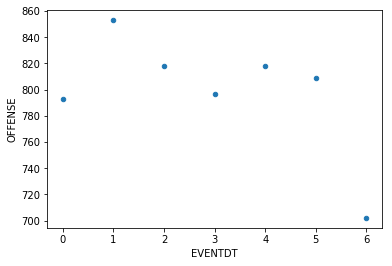

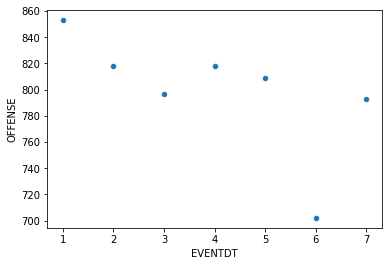

In [116]:
# count the amount of calls per day of the week
day_of_week_ct = df.groupby(pd.to_datetime(df['EVENTDT']).dt.dayofweek)['OFFENSE'].count().to_frame()
print(day_of_week_ct)

# reset_index to turn the groupby object back into a dataframe
day_of_week_ct_df = day_of_week_ct.reset_index()

# plot a scatter plot of day of week vs offense, 0 = Monday, 6 = Sunday
day_of_week_ct_df.plot(x='EVENTDT', y='OFFENSE', kind='scatter')

# Test if there's a correlation btwn day of week and # of calls
# spearman correlation is good for testing ordinal data like day of week
# pearson correlation is good for continuous data, a good generic test
print(day_of_week_ct_df.corr(method='spearman').iloc[0]['OFFENSE'])
print(day_of_week_ct_df.corr(method='pearson').iloc[0]['OFFENSE'])

# Try starting the week on Tuesday instead of Monday, aka reassigning Monday as 7 instead of 0
day_of_week_ct_df.loc[day_of_week_ct_df['EVENTDT'] == 0, 'EVENTDT'] = 7
print(day_of_week_ct_df)

# See better spearman correlation when starting the week on Tue
day_of_week_ct_df.plot(x='EVENTDT', y='OFFENSE', kind='scatter')
print(day_of_week_ct_df.corr(method='spearman').iloc[0]['OFFENSE'])
print(day_of_week_ct_df.corr(method='pearson').iloc[0]['OFFENSE'])

# Check spearman stats to make sure the correlation is significant
from scipy import stats
stats.spearmanr(day_of_week_ct_df['EVENTDT'],day_of_week_ct_df['OFFENSE'])

In [117]:
# There appears to be a relationship between day of the week and the number of calls, 
# with higher number of calls starting on Tuesdays, and declining numbers as the week progresses
# Statistically there's a significant inverse correlation btwn days of the week starting on Tuesdays and # of calls
# Note: just by eyeballing the scatterplot, it seems like Sunday could be an outlier for low # of calls

With the day that has the most calls, check the type of offense that appears the most.

In [145]:
# dataframe index EVENTDT for Tuesdays, then groupby OFFENSE, and do a count on any column, and sort by descending order
df[pd.to_datetime(df['EVENTDT']).dt.dayofweek==1].groupby('OFFENSE')['CASENO'].count().sort_values(ascending=False)

# Answer: Tuesdays has the most calls, and on Tuesdays, BURGLARY AUTO is the type of offense that appears most 

OFFENSE
BURGLARY AUTO               173
THEFT MISD. (UNDER $950)    129
VANDALISM                    65
DISTURBANCE                  65
VEHICLE STOLEN               51
BURGLARY RESIDENTIAL         48
THEFT FELONY (OVER $950)     41
ASSAULT/BATTERY MISD.        38
ROBBERY                      38
NARCOTICS                    36
DOMESTIC VIOLENCE            23
FRAUD/FORGERY                19
IDENTITY THEFT               19
THEFT FROM AUTO              18
BURGLARY COMMERCIAL          17
ALCOHOL OFFENSE              17
ASSAULT/BATTERY FEL.         14
MISSING ADULT                 9
SEXUAL ASSAULT FEL.           6
SEXUAL ASSAULT MISD.          5
BRANDISHING                   5
THEFT FROM PERSON             5
VEHICLE RECOVERED             3
GUN/WEAPON                    2
MISSING JUVENILE              2
ARSON                         2
2ND RESPONSE                  2
MUNICIPAL CODE                1
Name: CASENO, dtype: int64

# <font color = "red">Pandas HW 3</font>

Do these numbers match the results of the overall DF?


Let's try something else, Friday and Saturday nights are typically associated with being the "party" time. If this is true should there be more Liquor/Drug/Disordely Conduct/etc. occurrences those nights?

Let's try it with Fridays!

In [173]:
#only display rows with the D.O.W of Friday
#create a temp df

# oh boy, just realized that the CVDOW column represents Day of Week
# so I didn't need to find the Day of Week above in Problem 2, well.. I got more practice!
# NOTE: CVDOW has 0 as Sunday, 1 as Monday, 6 as Saturday
# while the conversion I did using datetime has 0 as Monday, 6 as Sunday
# Hence my day of week numbers and CVDOW has diff of 1

print(df['EVENTDESC'].unique())

# pandas use .isin([list of values]) to check for membership
df[df['EVENTDESC'].isin(['LIQUOR LAW VIOLATION','DISORDERLY CONDUCT','DRUG VIOLATION'])].groupby('CVDOW')['CASENO'].count().to_frame()


['BURGLARY - VEHICLE' 'WEAPONS OFFENSE' 'LARCENY' 'DRUG VIOLATION'
 'LIQUOR LAW VIOLATION' 'DISORDERLY CONDUCT' 'VANDALISM'
 'LARCENY - FROM VEHICLE' 'FAMILY OFFENSE' 'NOISE VIOLATION' 'FRAUD'
 'BURGLARY - COMMERCIAL' 'ASSAULT' 'ROBBERY' 'MOTOR VEHICLE THEFT'
 'BURGLARY - RESIDENTIAL' 'MISSING PERSON' 'RECOVERED VEHICLE'
 'ALL OTHER OFFENSES' 'SEX CRIME' 'ARSON' 'KIDNAPPING']


,CASENO
CVDOW,
0,141
1,119
2,118
3,114
4,113
5,137
6,162


In [174]:
# Yes, there are more Liquor/Drug/Disordely Conduct occurences on Fridays, Saturdays, and Sundays compared to the other days of the week

In [175]:
# If we want to see the type of event desc on Fridays
df[df['CVDOW']==5].groupby('EVENTDESC')['CASENO'].count().sort_values(ascending=False)

EVENTDESC
LARCENY                   186
BURGLARY - VEHICLE        137
VANDALISM                  76
DRUG VIOLATION             59
DISORDERLY CONDUCT         50
MOTOR VEHICLE THEFT        49
ASSAULT                    41
BURGLARY - RESIDENTIAL     38
FRAUD                      30
LIQUOR LAW VIOLATION       28
LARCENY - FROM VEHICLE     25
FAMILY OFFENSE             18
MISSING PERSON             17
ROBBERY                    16
BURGLARY - COMMERCIAL      14
NOISE VIOLATION            13
WEAPONS OFFENSE            12
SEX CRIME                   6
ARSON                       2
ALL OTHER OFFENSES          1
Name: CASENO, dtype: int64

# <font color = "red">Pandas HW 4</font>
Let's try it with Saturdays!

In [178]:
#only display rows with the D.O.W of Saturday
#create a temp df

In [179]:
#count the number of offenses by type
df[df['CVDOW']==6].groupby('OFFENSE')['CASENO'].count().sort_values(ascending=False)

OFFENSE
THEFT MISD. (UNDER $950)    126
BURGLARY AUTO               125
NARCOTICS                    64
DISTURBANCE                  63
VANDALISM                    55
BURGLARY RESIDENTIAL         41
VEHICLE STOLEN               39
THEFT FELONY (OVER $950)     39
ASSAULT/BATTERY MISD.        37
ALCOHOL OFFENSE              35
ASSAULT/BATTERY FEL.         25
2ND RESPONSE                 25
THEFT FROM AUTO              21
ROBBERY                      20
DOMESTIC VIOLENCE            15
IDENTITY THEFT               15
FRAUD/FORGERY                14
BURGLARY COMMERCIAL          14
MISSING ADULT                 6
GUN/WEAPON                    6
SEXUAL ASSAULT FEL.           6
MISSING JUVENILE              4
BRANDISHING                   4
SEXUAL ASSAULT MISD.          4
ARSON                         3
VEHICLE RECOVERED             2
MUNICIPAL CODE                1
Name: CASENO, dtype: int64

In [177]:
#count the number of events by type
df[df['CVDOW']==6].groupby('EVENTDESC')['CASENO'].count().sort_values(ascending=False)

EVENTDESC
LARCENY                   165
BURGLARY - VEHICLE        125
DRUG VIOLATION             64
DISORDERLY CONDUCT         63
ASSAULT                    62
VANDALISM                  55
BURGLARY - RESIDENTIAL     41
MOTOR VEHICLE THEFT        39
LIQUOR LAW VIOLATION       35
FRAUD                      29
NOISE VIOLATION            25
LARCENY - FROM VEHICLE     21
ROBBERY                    20
FAMILY OFFENSE             15
BURGLARY - COMMERCIAL      14
WEAPONS OFFENSE            10
MISSING PERSON             10
SEX CRIME                  10
ARSON                       3
RECOVERED VEHICLE           2
ALL OTHER OFFENSES          1
Name: CASENO, dtype: int64

# <font color = "red"> GROUP WORK</font> 
<i>"Companies hire Data Scientists who can clearly and fluently translate their technical findings to a non-technical team, such as the Marketing or Sales departments. The goal is to enable the business to make decisions by arming them with quantified insights, in addition to understanding the needs of their non-technical colleagues in order to wrangle the data appropriately"</i>

## What do YOU want to find out? YOUR DATA INVESTIGATION


In this notebook you have been learning all these techniques to be able to manipulate your dataframe to your preference. We know how to clean and explore our data, but what questions or topics did you actually want to learn from the data? 

<b> * In groups of 2-4 people, investigate the dataframe in this notebook and pick a question/topic to answer. Using the techniques you learned today, show relationships and results that would support that question/topic. 
</b><br><br>
<b>Each</b> group will present their investigations and why they are significant to the class.


In [180]:
df.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,EVENTDESC,CVDOW,BLKADDR,LATITUDE,LONGITUDE
0,17034187,BURGLARY AUTO,2017-06-14,15:15,BURGLARY - VEHICLE,3,ALLSTON WAY & SHATTUCK AVE,37.869363,-122.268028
1,17052235,GUN/WEAPON,2017-09-01,22:56,WEAPONS OFFENSE,5,UNIVERSITY AVENUE & MILVIA ST,37.871884,-122.270752
2,17091126,THEFT MISD. (UNDER $950),2017-06-10,10:45,LARCENY,6,2500 SHATTUCK AVE,37.863811,-122.267412
3,17018444,BURGLARY AUTO,2017-04-02,19:30,BURGLARY - VEHICLE,0,DURANT AVENUE & ELLSWORTH ST,37.867221,-122.263531
4,17033328,NARCOTICS,2017-06-10,14:30,DRUG VIOLATION,6,MILVIA STREET & UNIVERSITY AVE,37.871884,-122.270752


         EVENTDESC
EVENTTM           
0              283
1              190
2              151
3              117
4               79
5               67
6               83
7              111
8              182
9              190
10             249
11             236
12             373
13             252
14             246
15             259
16             281
17             317
18             336
19             352
20             313
21             313
22             335
23             275


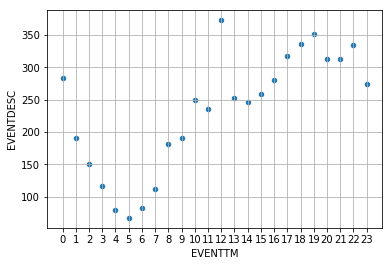

In [197]:
# Look at types of crime (EVENTDESC) by time of day

hr_of_day_ct = df.groupby(pd.to_datetime(df['EVENTTM']).dt.hour)['EVENTDESC'].count().to_frame()
print(hr_of_day_ct)

# reset_index to turn the groupby object back into a dataframe
hr_of_day_ct_df = hr_of_day_ct.reset_index()

# plot a scatter plot of time of day vs EVENTDESC
hr_of_day_ct_df.plot(x='EVENTTM', y='EVENTDESC', kind='scatter', xticks=hr_of_day_ct_df['EVENTTM'], grid=True)

In [198]:
# Looks like # of calls picks up starting at 10am and increase for the rest of the day, and then starts to drop starting at 11pm
# There's peak # of calls at 12 noon, possibly due to confounds of lunchtime when people have time to call in a crime, hence may not necessarily mean more crimes happening at noon
# With the exception of 12 noon, # of calls peak at 7pm, and is lowest at 5am
